### a. Définition des caractéristiques de la poutre et des conditions aux limites

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Caractéristiques géométriques et matérielles
L = 10.0  # Longueur de la poutre en mètres
A = 0.01  # Section transversale en mètres carrés
E = 210e9  # Module de Young en Pascals
I = 8.1e-6  # Moment d'inertie en mètres à la puissance quatre

# Discrétisation de la poutre en éléments finis
n = 10  # Nombre d'éléments
node_count = n + 1  # Nombre de nœuds
element_length = L / n  # Longueur de chaque élément

# Conditions aux limites et charges
fixed_nodes = [0]  # Encastrement au nœud 0
load_node = n  # Charge appliquée au nœud n
load_value = -10000  # Valeur de la charge en Newtons


### b. Formation de la matrice de rigidité élémentaire et assemblage de la matrice de rigidité globale

In [2]:
# Fonction pour calculer la matrice de rigidité élémentaire
def element_stiffness_matrix(E, I, L):
    k = (E * I / L**3) * np.array([
        [12, 6*L, -12, 6*L],
        [6*L, 4*L**2, -6*L, 2*L**2],
        [-12, -6*L, 12, -6*L],
        [6*L, 2*L**2, -6*L, 4*L**2]
    ])
    return k

# Initialisation de la matrice de rigidité globale
global_stiffness_matrix = np.zeros((2*node_count, 2*node_count))

# Assemblage de la matrice de rigidité globale
for i in range(n):
    ke = element_stiffness_matrix(E, I, element_length)
    global_stiffness_matrix[2*i:2*i+4, 2*i:2*i+4] += ke


### c. Application des conditions aux limites

In [4]:
# Application des conditions aux limites (encastrement au nœud 0)
for node in fixed_nodes:
    global_stiffness_matrix[2*node, :] = 0
    global_stiffness_matrix[:, 2*node] = 0
    global_stiffness_matrix[2*node+1, :] = 0
    global_stiffness_matrix[:, 2*node+1] = 0
    global_stiffness_matrix[2*node, 2*node] = 1
    global_stiffness_matrix[2*node+1, 2*node+1] = 1


### d. Résolution du système d'équations pour obtenir les déplacements nodaux

In [5]:
# Vecteur des forces
force_vector = np.zeros(2*node_count)
force_vector[2*load_node+1] = load_value

# Résolution du système d'équations
displacements = np.linalg.solve(global_stiffness_matrix, force_vector)


### e. Calcul des contraintes et déformations

In [7]:
# Calcul des déformations et contraintes
def calculate_strain_displacement(element_displacements, L):
    return (element_displacements[1] - element_displacements[0]) / L

def calculate_stress(strain, E):
    return strain * E

# Calcul des déformations et contraintes pour chaque élément
strains = np.zeros(n)
stresses = np.zeros(n)
for i in range(n):
    u = displacements[2*i:2*i+2]  # Prendre les déplacements nodaux pour l'élément
    strains[i] = calculate_strain_displacement(u, element_length)
    stresses[i] = calculate_stress(strains[i], E)


### f. Visualisation des résultats

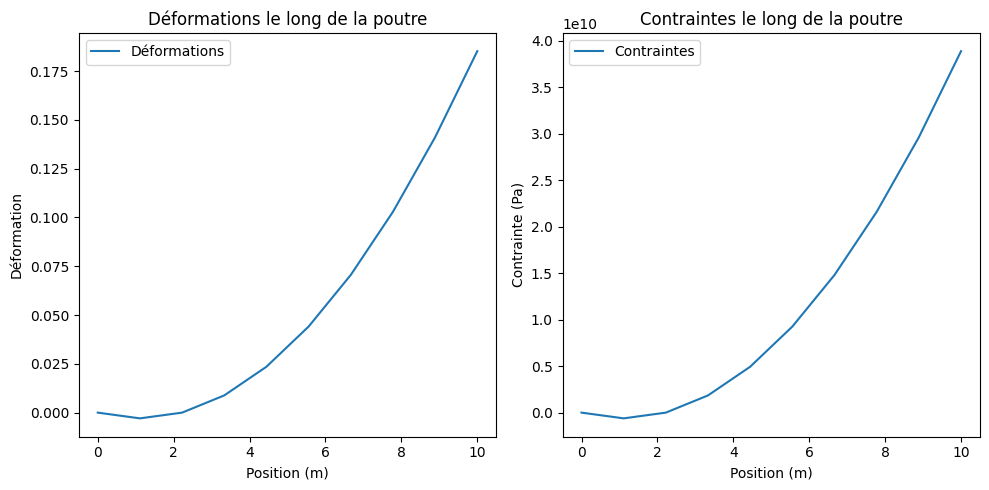

In [8]:
# Visualisation des déformations et des contraintes
x = np.linspace(0, L, n)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, strains, label='Déformations')
plt.xlabel('Position (m)')
plt.ylabel('Déformation')
plt.title('Déformations le long de la poutre')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, stresses, label='Contraintes')
plt.xlabel('Position (m)')
plt.ylabel('Contrainte (Pa)')
plt.title('Contraintes le long de la poutre')
plt.legend()

plt.tight_layout()
plt.show()
